<a href="https://colab.research.google.com/github/Panchol211/week_6_core_IP/blob/master/Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The main aim of the analysis is to be able to predict the results of a game and if the team is at home or away , also be able to predict if the game is friendly ##

In [233]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression



##Reading the Data##

In [142]:
fifa_ranking = pd.read_csv("fifa_ranking.csv")
results = pd.read_csv("results.csv")

##Checking the Data##

In [143]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [144]:
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [145]:
# Determining the no. of records in our dataset
fifa_ranking.shape

(57793, 16)

In [146]:
#previewing the top of the dataset
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [177]:
results.shape

(40839, 9)

In [147]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [148]:
results.shape

(40839, 9)

In [149]:
# Checking whether each column has an appropriate datatype
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

The rest of the variables are either int or float on 4 variables are objects 

In [150]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

Just only the home score and away school are int the rest are objects, neutral is boolean

##Tidying the Dataset##

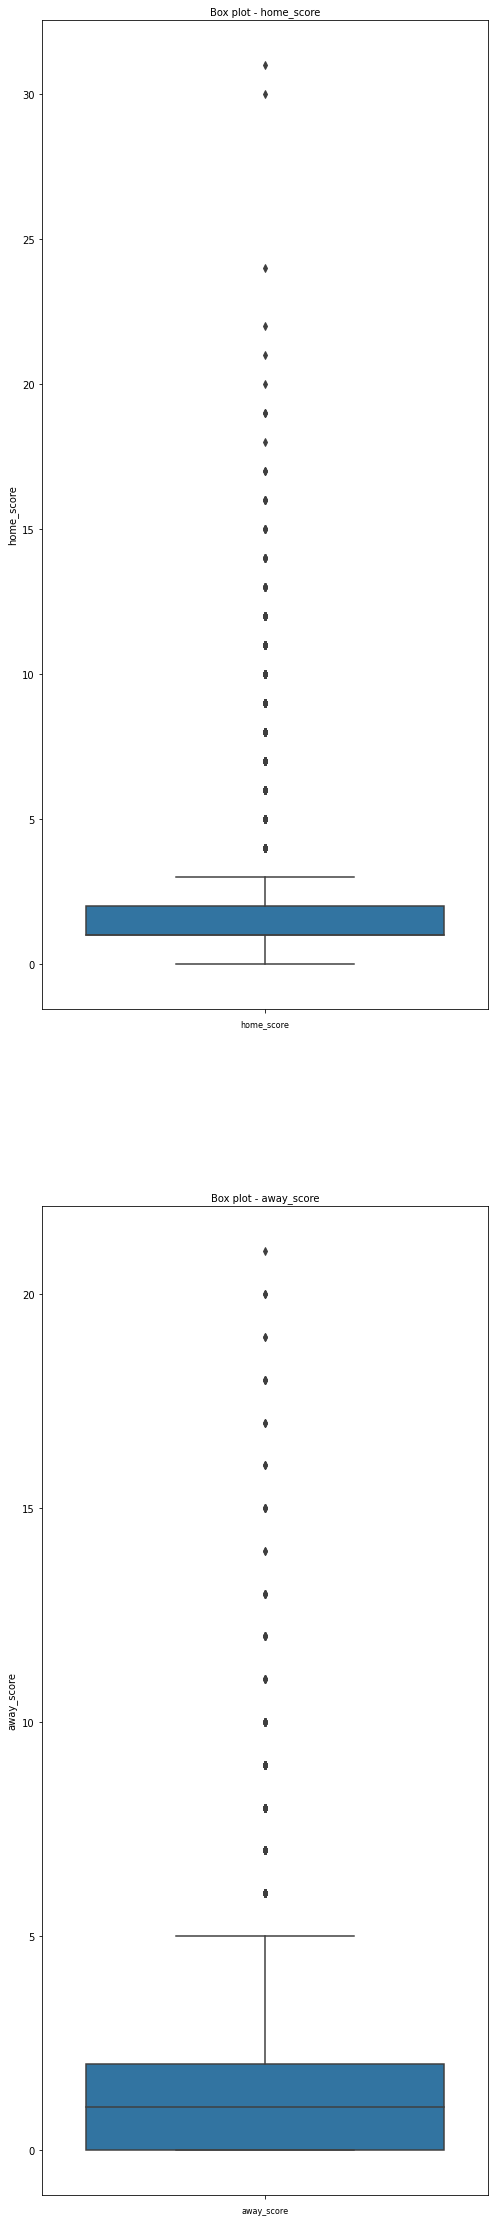

In [151]:
# Checking if there are outliers in the dataset
col_name = ["home_score", "away_score"]
fig, ax= plt.subplots(len(col_name), figsize=(8,40))
for i, col_val in enumerate(col_name):
        sns.boxplot(y=results[col_val], ax=ax[i])
        ax[i].set_title('Box plot - '+col_val, fontsize=10)
        ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

There are a lot of outliers in the score data but we can't remove them because they are important for analysis.

In [152]:
#checking for null values 
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [153]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

There are no null values in the dataset .

##Exploratory Data Analysis##

Plotting univeriate and bivariate 

In [154]:
results.columns


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [155]:
fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [156]:
# Stats summary of the dataset
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [174]:
df =results['home_team']
df.head(10)

0    Scotland
1     England
2    Scotland
3     England
4    Scotland
5    Scotland
6     England
7       Wales
8    Scotland
9    Scotland
Name: home_team, dtype: object

In [176]:
df1 =results['away_team']
df1.head()

0     England
1    Scotland
2     England
3    Scotland
4     England
Name: away_team, dtype: object

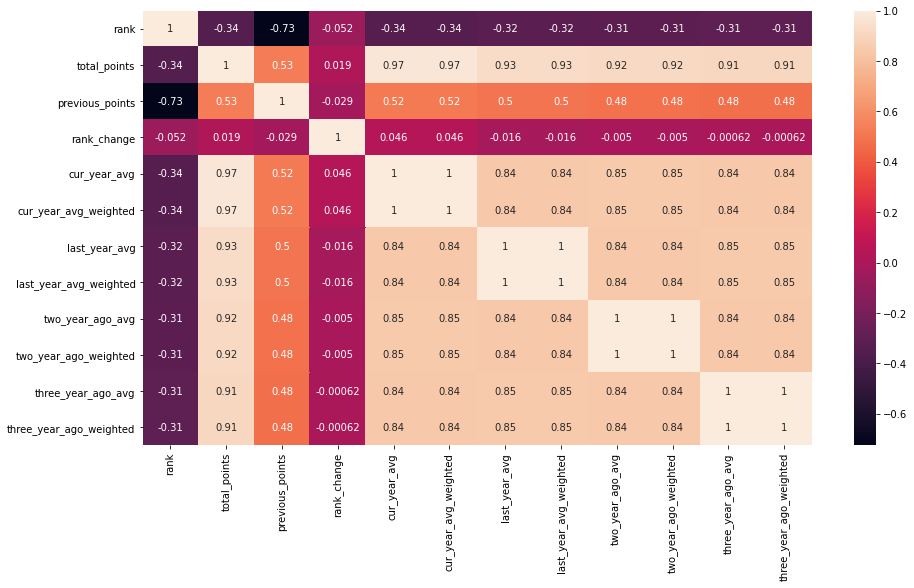

In [157]:
## plotting to check how variable are correlated to each other 
plt.subplots(figsize=(15,8))
sns.heatmap(fifa_ranking.corr(method='pearson'), annot=True)
plt.show()

In [158]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


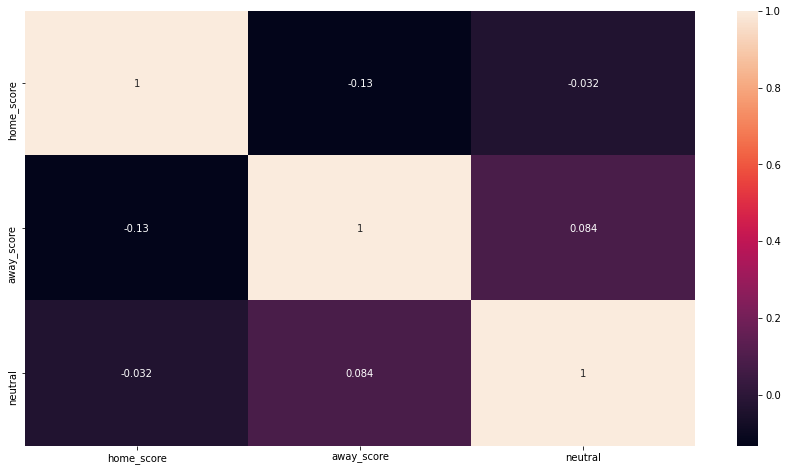

In [159]:
plt.subplots(figsize=(15,8))
sns.heatmap(results.corr(method='pearson'), annot=True)
plt.show()

The correlation amongst the scores is very low

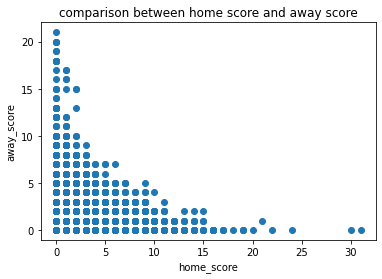

In [160]:
# Scatterplot of time on app vs. time on website
plt.scatter(x=results['home_score'], y=results['away_score'])
plt.title('comparison between home score and away score')
plt.xlabel('home_score')
plt.ylabel('away_score')
plt.show()

 I want to predict if ranking depends on	total_points, previous_points,cur_year_avg,	cur_year_avg_weighted,last_year_avg,	last_year_avg_weighted,two_year_ago_avg	two_year_ago_weighted,three_year_ago_avg	three_year_ago_weighted

In [161]:
fifa_ranking1 = fifa_ranking.drop(["country_full", "country_abrv","rank_change","confederation","rank_date"], 1)
fifa_ranking1.head()

,rank,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,1,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
fifa_ranking1.describe()

,rank,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [163]:
fifa_ranking1.sum()

rank                        5873392.00
total_points                7054712.73
previous_points            19204783.00
cur_year_avg                3571526.62
cur_year_avg_weighted       3571526.62
last_year_avg               3525638.98
last_year_avg_weighted      1762823.90
two_year_ago_avg            3454718.87
two_year_ago_weighted       1036417.90
three_year_ago_avg          3419838.15
three_year_ago_weighted      683969.24
dtype: float64

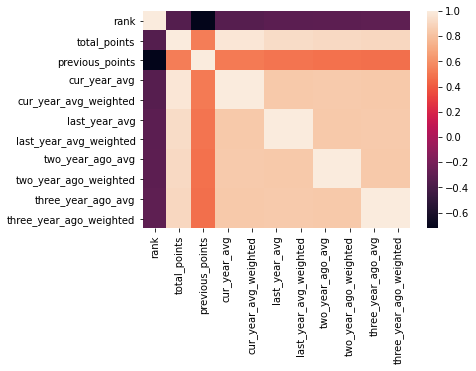

In [164]:
sns.heatmap(fifa_ranking1.corr())
plt.show()

In [165]:
fifa_ranking1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   total_points             57793 non-null  float64
 2   previous_points          57793 non-null  int64  
 3   cur_year_avg             57793 non-null  float64
 4   cur_year_avg_weighted    57793 non-null  float64
 5   last_year_avg            57793 non-null  float64
 6   last_year_avg_weighted   57793 non-null  float64
 7   two_year_ago_avg         57793 non-null  float64
 8   two_year_ago_weighted    57793 non-null  float64
 9   three_year_ago_avg       57793 non-null  float64
 10  three_year_ago_weighted  57793 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 4.9 MB


## Cleaning the results data for merging with the  ranking data##

In [166]:
results1 = results.drop(["date", "city","country","neutral"], 1)
results1.head()


,home_team,away_team,home_score,away_score,tournament
0,Scotland,England,0,0,Friendly
1,England,Scotland,4,2,Friendly
2,Scotland,England,2,1,Friendly
3,England,Scotland,2,2,Friendly
4,Scotland,England,3,0,Friendly


In [294]:
# coming up with data for win, loss, draw
winner = []
for i in range(len(results1["home_team"])):
  if results1['home_score'][i] > results1['away_score'][i]:
    winner.append(results1['home_team'][i])
  elif results1['home_score'][i]< results1['away_score'][i]:
    winner.append(results['away_team'][i])
  else:
    winner.append('Draw')
    
results1['winner_team'] = winner
##adding goal differenc column
results1['goal_difference'] = np.absolute(results1['home_score'] - results1['away_score'])
results1.head()


,home_team,away_team,home_score,away_score,tournament,winner_team,goal_difference
0,Scotland,England,0,0,Friendly,Draw,0
1,England,Scotland,4,2,Friendly,England,2
2,Scotland,England,2,1,Friendly,Scotland,1
3,England,Scotland,2,2,Friendly,Draw,0
4,Scotland,England,3,0,Friendly,Scotland,3


In [ ]:
def result(goal_difference):
  if goal_difference > 0:
    return 'Win'
  elif goal_difference < 0:
    return 'Lose'
  else:
    return 'Draw'
    


In [ ]:
## create the data for prediction 
results1 = results1.reset_index(drop=True)
results1.loc[results1.winning_team == results1.home_team,'winner_team']=2
results1.loc[results1.winning_team == 'Draw', 'winner_team']=1
results1.loc[results1.winning_team == results1.away_team, 'winner_team']=0

results1.head()

##merging the ranking and the result data##

In [173]:
fifa_data = pd.concat([fifa_ranking1,results1],axis=1)
fifa_data.head()

,rank,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,winner_team,goal_difference
0,1,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,Draw,0.0
1,2,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,4.0,2.0,Friendly,England,2.0
2,3,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,2.0,1.0,Friendly,Scotland,1.0
3,4,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,England,Scotland,2.0,2.0,Friendly,Draw,0.0
4,5,0.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,3.0,0.0,Friendly,Scotland,3.0


In [181]:
away_team = fifa_data["away_team"]
away_team.head(5)

0     England
1    Scotland
2     England
3    Scotland
4     England
Name: away_team, dtype: object

In [182]:
home_team = fifa_data["home_team"]
home_team.head()

0    Scotland
1     England
2    Scotland
3     England
4    Scotland
Name: home_team, dtype: object

In [186]:
tournament = fifa_data["tournament"]
tournament.value_counts()


Friendly                                16911
FIFA World Cup qualification             7100
UEFA Euro qualification                  2432
African Cup of Nations qualification     1616
FIFA World Cup                            900
                                        ...  
World Unity Cup                             4
Dragon Cup                                  4
Atlantic Heritage Cup                       2
Copa América qualification                  2
AFF Championship qualification              2
Name: tournament, Length: 109, dtype: int64

In [194]:
tournament1 = pd.get_dummies(fifa_data['tournament'])
tournament1.head()

,ABCS Tournament,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFC Challenge Cup qualification,AFF Championship,AFF Championship qualification,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,Amílcar Cabral Cup,Atlantic Cup,Atlantic Heritage Cup,Balkan Cup,Baltic Cup,Brazil Independence Cup,British Championship,CCCF Championship,CECAFA Cup,CFU Caribbean Cup,CFU Caribbean Cup qualification,CONCACAF Championship,CONCACAF Championship qualification,CONIFA European Football Cup,CONIFA World Football Cup,COSAFA Cup,Confederations Cup,Copa América,Copa América qualification,Copa Artigas,Copa Bernardo O'Higgins,Copa Carlos Dittborn,Copa Chevallier Boutell,Copa Félix Bogado,Copa Juan Pinto Durán,Copa Lipton,Copa Newton,Copa Oswaldo Cruz,Copa Paz del Chaco,Copa Premio Honor Argentino,...,Lunar New Year Cup,Malta International Tournament,Merdeka Tournament,Merlion Cup,Millennium Cup,Mundialito,NAFU Championship,Nations Cup,Nehru Cup,Nile Basin Tournament,Nordic Championship,OSN Cup,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,Pan American Championship,Prime Minister's Cup,Rous Cup,SAFF Cup,SKN Football Festival,Simba Tournament,South Pacific Games,Tournoi de France,UAFA Cup,UAFA Cup qualification,UDEAC Cup,UEFA Euro,UEFA Euro qualification,UEFA Nations League,UNCAF Cup,UNIFFAC Cup,USA Cup,United Arab Emirates Friendship Tournament,VFF Cup,Vietnam Independence Cup,Viva World Cup,WAFF Championship,West African Cup,Windward Islands Tournament,World Unity Cup
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [287]:
x_dict = tournament.to_dict()

In [288]:
from sklearn.feature_extraction import DictVectorizer
dv_X = DictVectorizer(sparse=False) 


In [ ]:
X_encoded = (dv_X.fit_transform(x_dict))
X_encoded

In [195]:
home_score = fifa_data["home_score"]

In [196]:
away_score = fifa_data["away_score"]


In [206]:
rank = fifa_data["rank"]
rank

0          1
1          2
2          3
3          4
4          5
        ... 
57788    206
57789    206
57790    206
57791    206
57792    206
Name: rank, Length: 57793, dtype: int64

In [215]:
fifa = fifa_data1.dropna()

In [216]:
fifa.isnull()

,away_score,home_team,away_team,rank
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
40834,False,False,False,False
40835,False,False,False,False
40836,False,False,False,False
40837,False,False,False,False


In [220]:
fifa_data1.isnull().sum()

away_score    16954
home_team     16954
away_team     16954
rank              0
dtype: int64

In [269]:
## Droping null values in the dataset
fifa_data2 = pd.concat([home_score, home_team, away_team,rank],axis=1)
fifa_data2.dropna()

,home_score,home_team,away_team,rank
0,0.0,Scotland,England,1
1,4.0,England,Scotland,2
2,2.0,Scotland,England,3
3,2.0,England,Scotland,4
4,3.0,Scotland,England,5
...,...,...,...,...
40834,8.0,American Samoa,Tahiti,42
40835,4.0,Fiji,Solomon Islands,44
40836,0.0,Senegal,Algeria,45
40837,0.0,Tajikistan,North Korea,46


In [270]:
fifa_data2.head()

,home_score,home_team,away_team,rank
0,0.0,Scotland,England,1
1,4.0,England,Scotland,2
2,2.0,Scotland,England,3
3,2.0,England,Scotland,4
4,3.0,Scotland,England,5


## Using polynomial function##

In [254]:
## creating columns for the wining, draw and loss 
winner = []
for i in range(len(results1["home_team"])):
  if results1['home_score'][i] > results1['away_score'][i]:
    winner.append(results1['home_team'][i])
  elif results1['home_score'][i]< results1['away_score'][i]:
    winner.append(results['away_team'][i])
  else:
    winner.append('Draw')
    
results1['winner_team'] = winner
##adding goal differenc column
results1['goal_difference'] = np.absolute(results1['home_score'] - results1['away_score'])
results1.head()

,home_team,away_team,home_score,away_score,tournament,winner_team,goal_difference
0,Scotland,England,0,0,Friendly,Draw,0
1,England,Scotland,4,2,Friendly,England,2
2,Scotland,England,2,1,Friendly,Scotland,1
3,England,Scotland,2,2,Friendly,Draw,0
4,Scotland,England,3,0,Friendly,Scotland,3


In [268]:
fifa = pd.concat([home_team, away_team, home_score,away_score,tournament, rank],axis=1)

fifa_clean = fifa.dropna()


In [273]:
fifa_clean.head()

,home_score,away_score,rank
0,0.0,0.0,1
1,4.0,2.0,2
2,2.0,1.0,3
3,2.0,2.0,4
4,3.0,0.0,5


In [260]:
## To predict how does the ranking of the team and home scores 
X = fifa_clean[['rank']]
y = fifa_clean[['away_score']]

In [ ]:
X_train,Y_train, X_test, Y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [261]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 1


The model is wrong because the prediction can't be one.

## Using logistic regression analysis

In [274]:
#Splitting my dataset so that it can be ready for training, I want to predict how does the ranking with respect to home scare 

X = fifa_clean.drop("away_score",axis=1)
y = fifa_clean["away_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [275]:
#fitting the data 

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
y_pred = LogReg.predict(X_test)

In [277]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[4511,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3999,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2143,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 938,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 362,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 145,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  73,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  33,    0,    0,    0,    0,    

In [278]:
fifa_ranking1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fifa_ranking1

,Actual,Predicted
9384,0.0,0.0
39620,1.0,0.0
2482,0.0,0.0
16995,0.0,0.0
21655,2.0,0.0
...,...,...
3060,1.0,0.0
32116,1.0,0.0
31873,2.0,0.0
33623,1.0,0.0


In [279]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1802154750244858
Mean Squared Error: 3.329742082925237
Root Mean Squared Error: 1.8247580888778756


This model is not efficent, I will do more analysis over the weekend 